In [63]:
# Dependencies and Setup
import os 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [64]:
consump_path = os.path.join("..", "data", "state_consumption.csv")
consump_df= pd.read_csv(consump_path)
consump_df.head(63)

,States,Residential,Unnamed: 2,Commercial,Unnamed: 4,Industrial,Unnamed: 6,Transportation,Unnamed: 8,All Sectors_Mwh,Unnamed: 10
0,Connecticut,1172,944,992,1040,249,238,8,10,2421,2232
1,Maine,371,331,291,308,244,143,0,0,907,782
2,Massachusetts,1642,1406,1773,2019,465,498,25,26,3904,3949
3,New Hampshire,395,323,335,352,161,161,0,0,891,836
4,Rhode Island,270,225,314,305,58,58,1,2,643,591
5,Vermont,170,147,149,158,107,111,0,0,426,417
6,New Jersey,2890,2641,3075,3203,537,510,22,26,6523,6380
7,New York,4377,3871,5530,6111,1266,1459,191,235,11364,11675
8,Pennsylvania,4349,3905,2832,3293,3914,4084,30,47,11124,11329
9,Illinois,4607,3687,3780,4043,3276,3487,29,38,11692,11256


In [65]:
price_path = os.path.join("..", "data", "state_price.csv")
price_df= pd.read_csv(price_path)
price_df.head(63)

,States,Residential,Unnamed: 2,Commercial,Unnamed: 4,Industrial,Unnamed: 6,Transportation,Unnamed: 8,All Sectors_cents per Kwh,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Connecticut,21.73,23.10,16.51,17.60,13.03,13.85,10.67,16.39,18.66,19.52
2,Maine,16.91,18.18,12.64,12.40,8.53,9.24,--,--,13.28,14.26
3,Massachusetts,21.01,21.36,15.18,16.53,13.87,14.25,5.26,5.2,17.41,17.89
4,New Hampshire,19.00,20.34,15.26,15.65,12.72,12.66,--,--,16.46,16.88
...,...,...,...,...,...,...,...,...,...,...,...
56,Oregon,11.32,11.27,8.96,8.74,6.18,6.11,9.53,9.31,9.08,8.87
57,Washington,9.92,9.90,9.05,8.75,4.83,4.59,10.37,9.51,8.21,7.84
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Alaska,23.85,23.51,20.45,20.45,17.55,17.06,--,--,20.89,20.62


In [66]:
state_df = pd.merge(price_df, consump_df, on = ['States'], how = 'outer')

state_df.head(64)

,States,Residential_x,Unnamed: 2_x,Commercial_x,Unnamed: 4_x,Industrial_x,Unnamed: 6_x,Transportation_x,Unnamed: 8_x,All Sectors_cents per Kwh,...,Residential_y,Unnamed: 2_y,Commercial_y,Unnamed: 4_y,Industrial_y,Unnamed: 6_y,Transportation_y,Unnamed: 8_y,All Sectors_Mwh,Unnamed: 10_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,California,19.79,20.87,19.15,18.39,16.17,15.04,10.09,8.67,18.78,...,8046.0,6507.0,8938.0,8890.0,4237.0,3767.0,51.0,63.0,21272.0,19227.0
59,Oregon,11.32,11.27,8.96,8.74,6.18,6.11,9.53,9.31,9.08,...,1363.0,1273.0,1204.0,1326.0,1005.0,1055.0,2.0,2.0,3574.0,3656.0
60,Washington,9.92,9.90,9.05,8.75,4.83,4.59,10.37,9.51,8.21,...,2498.0,2234.0,2054.0,2261.0,1774.0,2064.0,6.0,9.0,6332.0,6566.0
61,Alaska,23.85,23.51,20.45,20.45,17.55,17.06,--,--,20.89,...,140.0,131.0,187.0,209.0,100.0,97.0,0.0,0.0,427.0,436.0


In [67]:
state_group = state_df.groupby('States')
state_price = state_group["All Sectors_cents per Kwh"].mean()
state_price


States
Alabama           10.38
Alaska            20.89
Arizona           11.23
Arkansas           8.70
California        18.78
Colorado          10.94
Connecticut       18.66
Delaware          10.74
Florida           10.35
Georgia           10.35
Hawaii            26.03
Idaho              8.36
Illinois           9.84
Indiana           10.07
Iowa               9.65
Kansas            10.90
Kentucky           8.61
Louisiana          7.48
Maine             13.28
Maryland          11.01
Massachusetts     17.41
Michigan          13.16
Minnesota         12.03
Mississippi        9.18
Missouri          11.08
Montana            9.06
Nebraska           9.62
Nevada             8.76
New Hampshire     16.46
New Jersey        14.28
New Mexico         9.90
New York          15.85
North Carolina     9.60
North Dakota       9.38
Ohio               9.40
Oklahoma           7.92
Oregon             9.08
Pennsylvania       9.63
Rhode Island      16.82
South Carolina     9.99
South Dakota      10.30
Tennessee

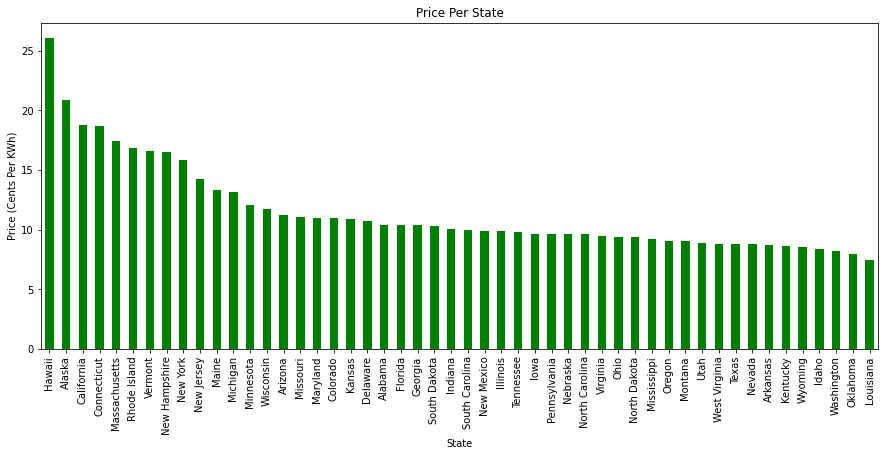

In [68]:
plt.figure(figsize=(15,6))
state_price = state_price.sort_values(ascending=False)
cost_chart = state_price.plot(kind='bar', color="green")
cost_chart.set_xlabel("State")
cost_chart.set_ylabel("Price (Cents Per KWh)")

plt.title("Price Per State")
plt.show()

In [69]:
state_group = state_df.groupby('States')
state_cons = state_group["All Sectors_Mwh"].mean()
state_cons


States
Alabama            7192.0
Alaska              427.0
Arizona            7832.0
Arkansas           3735.0
California        21272.0
Colorado           4783.0
Connecticut        2421.0
Delaware            926.0
Florida           21795.0
Georgia           11687.0
Hawaii              727.0
Idaho              2198.0
Illinois          11692.0
Indiana            7898.0
Iowa               4255.0
Kansas             3595.0
Kentucky           5969.0
Louisiana          7818.0
Maine               907.0
Maryland           4923.0
Massachusetts      3904.0
Michigan           8279.0
Minnesota          5113.0
Mississippi        4101.0
Missouri           6711.0
Montana            1128.0
Nebraska           2683.0
Nevada             3549.0
New Hampshire       891.0
New Jersey         6523.0
New Mexico         2157.0
New York          11364.0
North Carolina    11063.0
North Dakota       1507.0
Ohio              11895.0
Oklahoma           5790.0
Oregon             3574.0
Pennsylvania      11124.0
Rhode

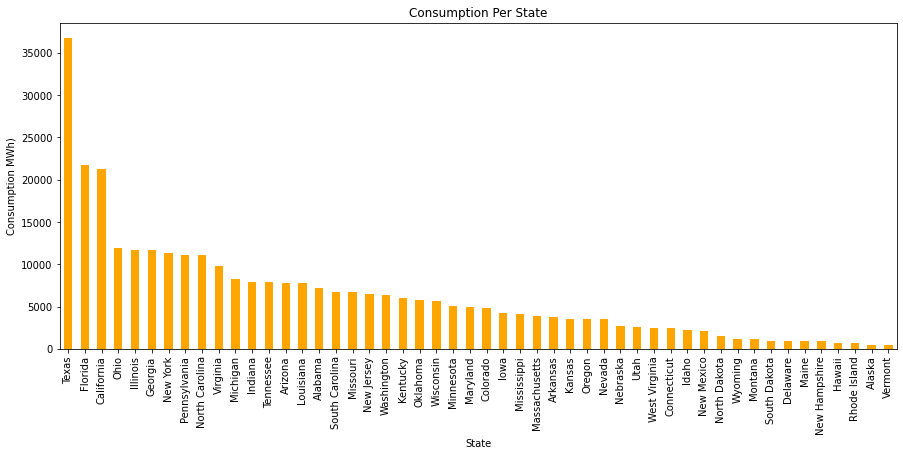

In [70]:
plt.figure(figsize=(15,6))
state_cons = state_cons.sort_values(ascending=False)
cost_chart = state_cons.plot(kind='bar', color="orange")
cost_chart.set_xlabel("State")
cost_chart.set_ylabel("Consumption MWh)")

plt.title("Consumption Per State")
plt.show()

<Figure size 1080x432 with 0 Axes>

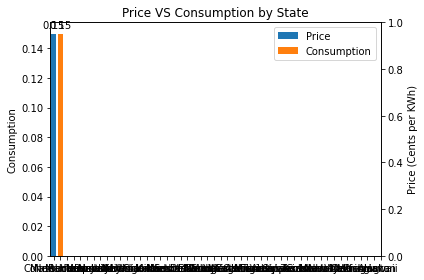

In [15]:

labels = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey',
          'New York', 'Pennsylvania', 'Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa',
          'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota', 'Delaware', 'Florida',
          'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama',
          'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas', 'Arizona',
          'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'California', 'Oregon', 
          'Washington', 'Alaska', 'Hawaii']


price_means = [ ]
consump_means = [ ]

x = np.arange(len(labels)) 
width = 0.15  

plt.figure(figsize=(15,6))
fig, ax = plt.subplots()
rects1 = ax.bar(['All Sectors_cents per Kwh'], width, label='Price')
rects2 = ax.bar(['All Sectors_Mwh'], width, label='Consumption')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Consumption')
ax.set_title('Price VS Consumption by State')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.set_ylabel("Price (Cents per KWh)")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

               
plt.show()